In [1]:
import sys
sys.path.insert(0, "../Python/")
from misc import *

%load_ext autoreload
%autoreload 2
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [2]:
# Load predicted data
dipoles_nn = load_dict("dipoles_nn.pickle")
dipoles_lm = load_dict("dipoles_lm.pickle")
n_snr = len(dipoles_nn)

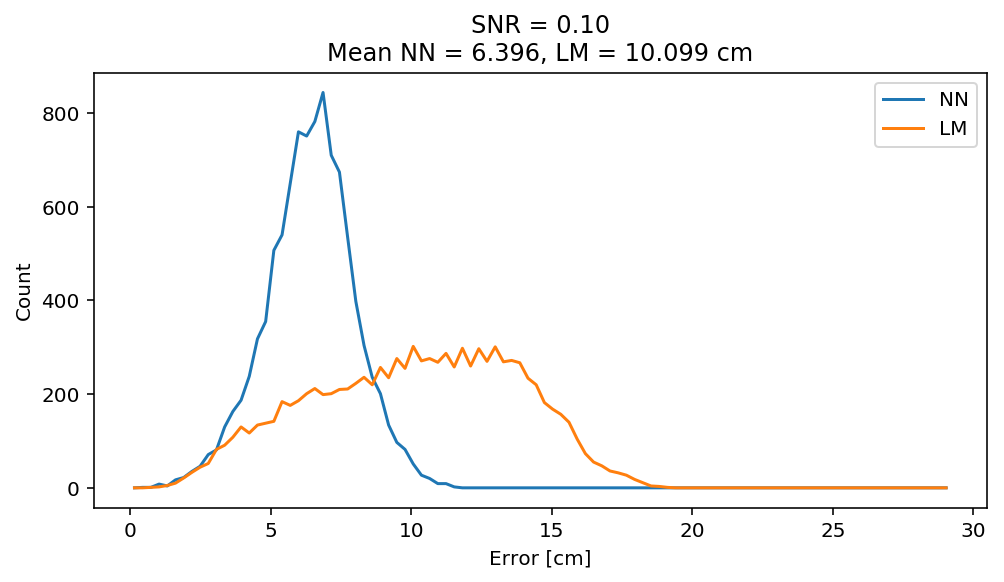

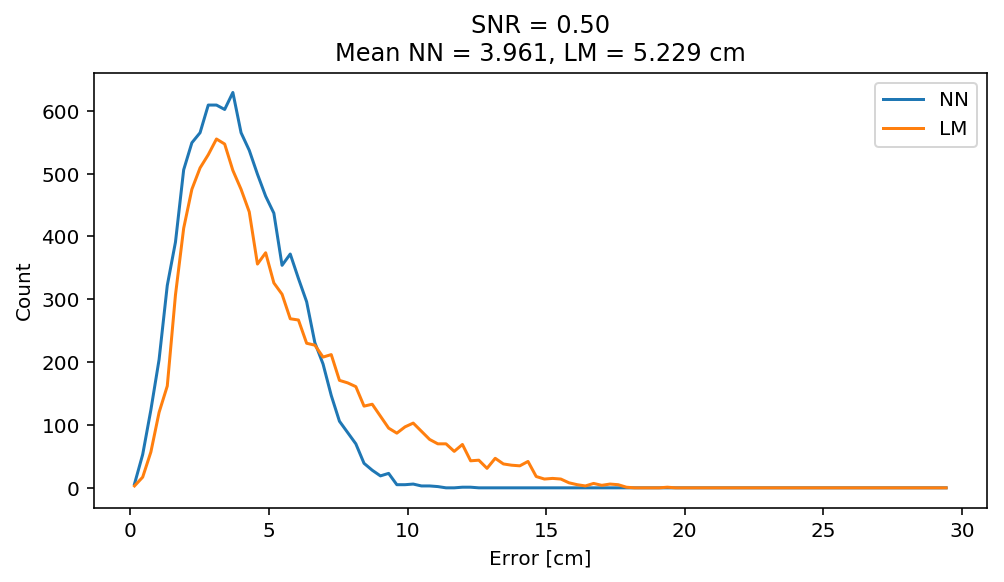

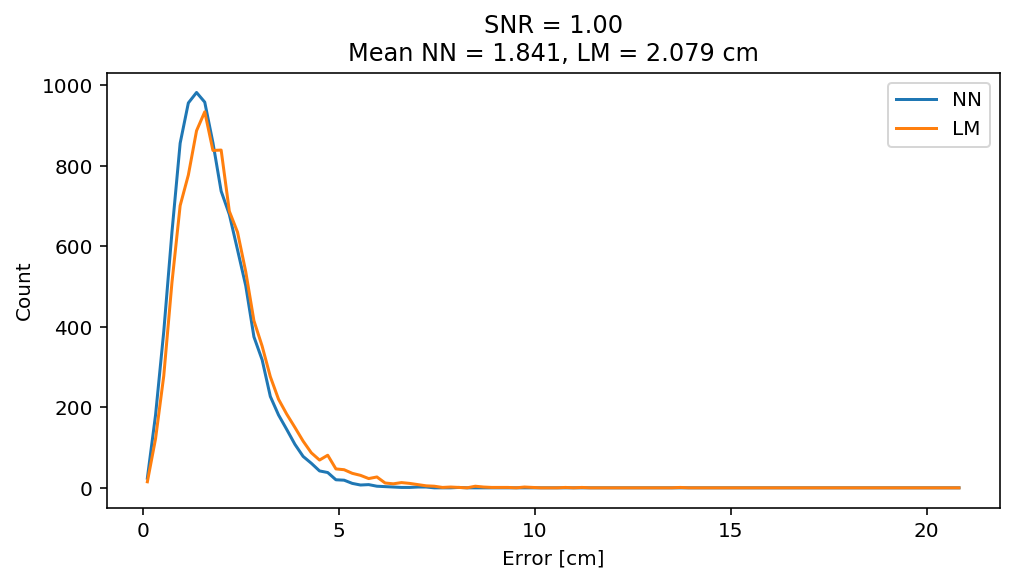

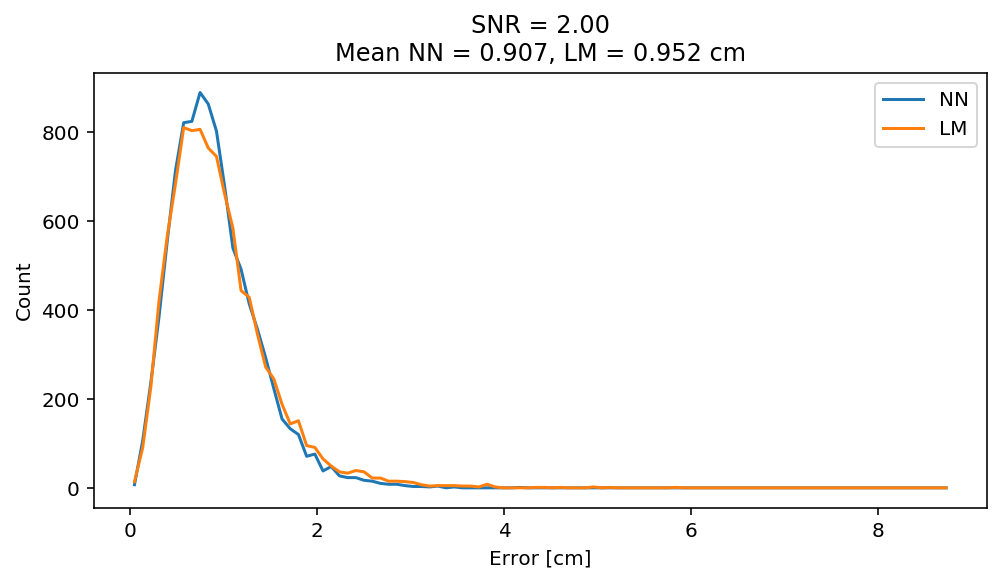

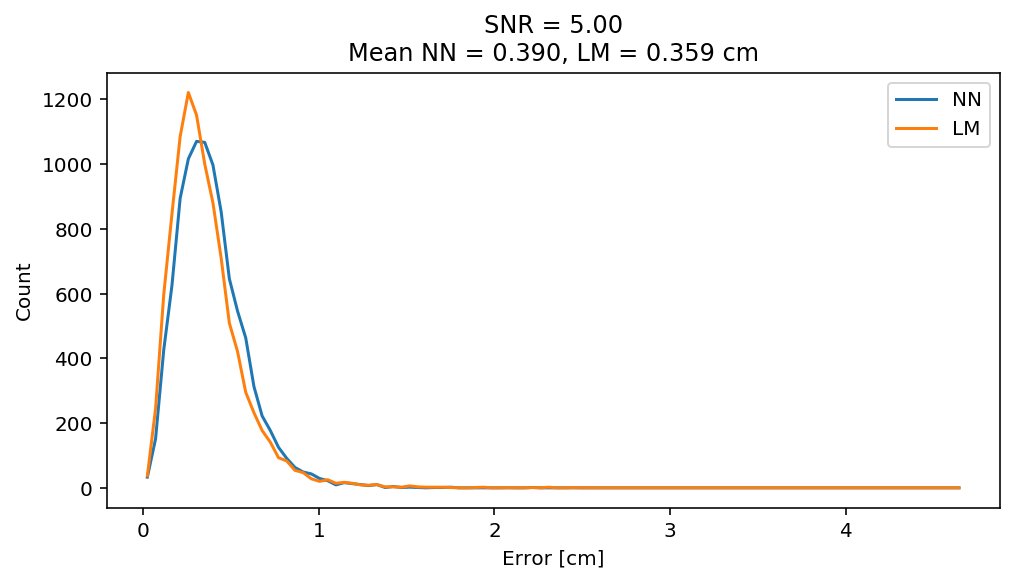

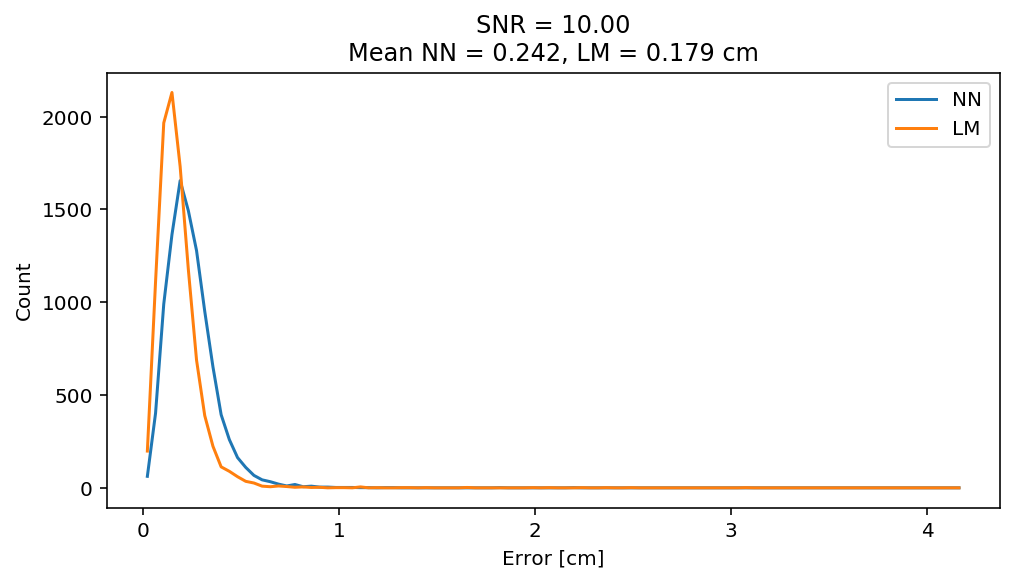

In [8]:
for i in range(n_snr):

    this_nn = dipoles_nn[i]
    this_lm = dipoles_lm[i]

    min_err = min(this_nn["loc_err"] + this_lm["loc_err"])
    max_err = max(this_nn["loc_err"] + this_lm["loc_err"])
    edges_start = 0
    edges_end = max_err + 1e-6
    n_bins = int(round(np.sqrt(len(this_nn["loc_err"]))))
    hist_edges = np.linspace(edges_start,edges_end,n_bins+1)
    bin_width = hist_edges[1] - hist_edges[0]
    hist_centers = np.linspace(hist_edges[0]+bin_width/2, hist_edges[-1]-bin_width/2, n_bins)
    hist_nn, _ = np.histogram(this_nn["loc_err"], hist_edges)
    hist_lm, _ = np.histogram(this_lm["loc_err"], hist_edges)

    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(hist_centers, hist_nn, label='NN')
    ax.plot(hist_centers, hist_lm, label='LM')
    ax.legend()
    ax.set_xlabel("Error [cm]")
    ax.set_ylabel("Count")    
    plt.title("SNR = {:.2f}\nMean NN = {:.3f}, LM = {:.3f} cm".format(
        this_nn["snr"], np.mean(this_nn["loc_err"]), np.mean(this_lm["loc_err"])))
    plt.show()

